<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [1846]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

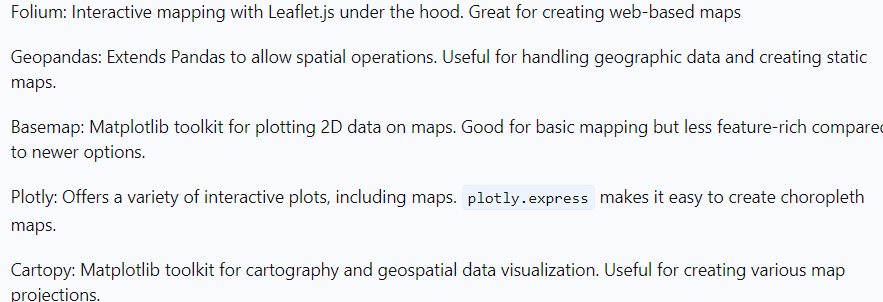

## Dataset Loading

In [1847]:
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [1848]:
'''df_1 = pd.read_csv('belga_0711.csv')
df_1['bus_dispatched'] = 3;
df_2 = pd.read_csv('deocareza_0711.csv')
df_2['bus_dispatched'] = 1
df_3 = pd.read_csv('graceda_0711.csv')
df_3['bus_dispatched'] = 2;
df_4 = pd.read_csv('manuel_0711.csv')
df_4['bus_dispatched'] = 4;
df_5 = pd.read_csv(Paralde_0711_url)
df_5['bus_dispatched'] = 5;

df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)'''

"df_1 = pd.read_csv('belga_0711.csv')\ndf_1['bus_dispatched'] = 3;\ndf_2 = pd.read_csv('deocareza_0711.csv')\ndf_2['bus_dispatched'] = 1\ndf_3 = pd.read_csv('graceda_0711.csv')\ndf_3['bus_dispatched'] = 2;\ndf_4 = pd.read_csv('manuel_0711.csv')\ndf_4['bus_dispatched'] = 4;\ndf_5 = pd.read_csv(Paralde_0711_url)\ndf_5['bus_dispatched'] = 5;\n\ndf = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)"

In [1849]:
'''df_1 = pd.read_csv('graceda_0712.csv')
df_1['bus_dispatched'] = 6;
df_2 = pd.read_csv('neri_0712.csv')
df_2['bus_dispatched'] =10;
df_3 = pd.read_csv('ostan_0712.csv')
df_3['bus_dispatched'] = 8;
df_4 = pd.read_csv('carmelotes_0711.csv')
df_4['bus_dispatched'] = 9;
df_5 = pd.read_csv('escuerdos_0712.csv')
df_5['bus_dispatched'] = 7;

df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)'''

"df_1 = pd.read_csv('graceda_0712.csv')\ndf_1['bus_dispatched'] = 6;\ndf_2 = pd.read_csv('neri_0712.csv')\ndf_2['bus_dispatched'] =10;\ndf_3 = pd.read_csv('ostan_0712.csv')\ndf_3['bus_dispatched'] = 8;\ndf_4 = pd.read_csv('carmelotes_0711.csv')\ndf_4['bus_dispatched'] = 9;\ndf_5 = pd.read_csv('escuerdos_0712.csv')\ndf_5['bus_dispatched'] = 7;\n\ndf = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)"

In [1850]:
'''df_1 = pd.read_csv('escuerdos_0713.csv')
df_1['bus_dispatched'] = 14;
df_2 = pd.read_csv('neri_0713.csv')
df_2['bus_dispatched'] =13;
df_3 = pd.read_csv('ostan_0713.csv')
df_3['bus_dispatched'] = 12;
df_4 = pd.read_csv('graceda_0713.csv')
df_4['bus_dispatched'] = 11;
df_5 = pd.read_csv('bajaro_0713.csv')
df_5['bus_dispatched'] = 15;

df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)'''

"df_1 = pd.read_csv('escuerdos_0713.csv')\ndf_1['bus_dispatched'] = 14;\ndf_2 = pd.read_csv('neri_0713.csv')\ndf_2['bus_dispatched'] =13;\ndf_3 = pd.read_csv('ostan_0713.csv')\ndf_3['bus_dispatched'] = 12;\ndf_4 = pd.read_csv('graceda_0713.csv')\ndf_4['bus_dispatched'] = 11;\ndf_5 = pd.read_csv('bajaro_0713.csv')\ndf_5['bus_dispatched'] = 15;\n\ndf = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)"

In [1851]:
df_1 = pd.read_csv('belga_0717.csv')
df_1['bus_dispatched'] = 17;
df_2 = pd.read_csv('caralde_0717.csv')
df_2['bus_dispatched'] =16;

df = pd.concat([df_1, df_2], ignore_index=True)

In [1852]:
# df = pd.read_csv(Caralde_0717_url)

In [1853]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers,bus_dispatched
12273,120.991553,14.536673,2023-07-17 11:37:49,0,0,21.0,11.0,37.0,49.0,0,1,13.409965,2.883579,0.000000,0.000000,Northbound,6,0,17
89971,121.013388,14.657418,2023-07-17 19:51:18,0,0,30.0,19.0,51.0,18.0,0,8,2.783233,16.490731,0.010940,0.001620,Southbound,9,0,16
84130,121.029052,14.550242,2023-07-17 18:16:38,0,0,9.0,18.0,16.0,38.0,0,7,12.706142,6.030290,0.000000,0.000000,Northbound,3,0,16
26616,120.991980,14.511663,2023-07-17 15:32:58,0,0,0.0,15.0,32.0,58.0,0,6,16.191039,0.175255,0.000000,0.000000,Southbound,5,0,17
28518,120.998063,14.537567,2023-07-17 16:04:24,0,0,14.0,16.0,4.0,24.0,0,12,13.351914,3.086239,0.000000,0.000000,Southbound,0,0,17
26701,120.991845,14.511172,2023-07-17 15:34:23,0,0,0.0,15.0,34.0,23.0,0,6,16.245267,0.136803,0.001448,-0.001854,Southbound,5,0,17
43085,121.037667,14.557055,2023-07-17 06:20:29,0,0,14.0,6.0,20.0,29.0,0,2,12.375061,7.219169,-0.001601,0.008216,Northbound,0,0,16
34055,120.998040,14.657225,2023-07-17 17:33:46,0,0,20.0,17.0,33.0,46.0,0,16,1.132025,16.306082,0.000000,0.000000,Southbound,5,0,17
42966,121.032333,14.552652,2023-07-17 06:18:31,0,0,21.0,6.0,18.0,31.0,0,7,12.586653,6.467940,-0.003281,0.010032,Northbound,3,0,16
20283,121.048957,14.623923,2023-07-17 13:47:20,0,0,28.0,13.0,47.0,20.0,0,4,7.575622,14.061503,0.008608,-0.005145,Southbound,8,0,17


In [1854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96759 entries, 0 to 96758
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 96759 non-null  float64
 1   latitude                  96759 non-null  float64
 2   timestamp                 96759 non-null  object 
 3   Board                     96759 non-null  int64  
 4   Alight                    96759 non-null  int64  
 5   Numpass                   96759 non-null  float64
 6   Hour                      96759 non-null  float64
 7   Min                       96759 non-null  float64
 8   Sec                       96759 non-null  float64
 9   Day_of_week               96759 non-null  int64  
 10  stop_cluster              96759 non-null  int64  
 11  distance_from_cluster_0   96759 non-null  float64
 12  distance_from_cluster_18  96759 non-null  float64
 13  dist_change_cluster_0     96757 non-null  float64
 14  dist_c

In [1855]:
df.describe()

,longitude,latitude,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,QuarterHour,waiting_passengers,bus_dispatched
count,96759.000000,96759.000000,96759.000000,96759.000000,96759.000000,96759.000000,96759.000000,96759.000000,96759.0,96759.000000,96759.000000,96759.000000,96757.000000,9.675700e+04,96759.000000,96759.000000,96759.00000
mean,121.016026,14.584584,0.018665,0.014655,23.708699,13.246768,29.418452,29.506154,0.0,9.146167,9.611223,8.991510,0.000002,-6.845121e-07,4.562666,0.161897,16.42424
std,0.024902,0.054435,0.135339,0.120168,14.455028,4.249411,17.153540,17.324890,0.0,5.937859,5.105093,6.150372,0.005884,6.299870e-03,3.301370,1.630642,0.49423
min,120.983440,14.507275,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.005502,0.008198,-0.601640,-3.198129e-01,0.000000,0.000000,16.00000
25%,120.991312,14.537243,0.000000,0.000000,14.000000,9.000000,15.000000,14.000000,0.0,4.000000,4.941276,2.958711,0.000000,0.000000e+00,2.000000,0.000000,16.00000
50%,121.011133,14.568213,0.000000,0.000000,23.000000,13.000000,29.000000,30.000000,0.0,9.000000,11.723075,8.730597,0.000000,0.000000e+00,4.000000,0.000000,16.00000
75%,121.038927,14.651027,0.000000,0.000000,30.000000,17.000000,44.000000,45.000000,0.0,14.000000,13.389975,16.246110,0.000000,0.000000e+00,7.000000,0.000000,17.00000
max,121.059877,14.657952,1.000000,1.000000,74.000000,21.000000,59.000000,59.000000,0.0,20.000000,16.675367,16.697862,0.424017,3.528536e-01,10.000000,27.000000,17.00000


In [1856]:
df.isnull().sum()

,0
longitude,0
latitude,0
timestamp,0
Board,0
Alight,0
Numpass,0
Hour,0
Min,0
Sec,0
Day_of_week,0


In [1857]:
df.duplicated().sum()

0

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [1858]:
#cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec', 'bus_dispatched']
cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec']

In [1859]:
'''df.drop(columns = ['id', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',
                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',
                   'Speed', 'fuelPressure','engineRPM', 'engineOilTemp',
                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',
                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',
                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',
                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)'''

"df.drop(columns = ['id', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',\n                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',\n                   'Speed', 'fuelPressure','engineRPM', 'engineOilTemp',\n                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',\n                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',\n                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',\n                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)"

In [1860]:
df = df[cols]

In [1861]:
df[(df['Alight'] == True) & (df['Board'] == True)]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec


In [1862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96759 entries, 0 to 96758
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  96759 non-null  float64
 1   latitude   96759 non-null  float64
 2   timestamp  96759 non-null  object 
 3   Board      96759 non-null  int64  
 4   Alight     96759 non-null  int64  
 5   Numpass    96759 non-null  float64
 6   Hour       96759 non-null  float64
 7   Min        96759 non-null  float64
 8   Sec        96759 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 6.6+ MB


In [1863]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Hour'] = df['timestamp'].dt.hour
df['Min'] = df['timestamp'].dt.minute
df['Sec'] = df['timestamp'].dt.second
df['Time'] = df['timestamp'].dt.time
df['datePH'] = df['timestamp'].dt.date
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [1864]:
df['Board'].ffill(inplace = True)
df['Alight'].ffill(inplace = True)
df['Numpass'].ffill(inplace = True)

In [1865]:
df.isna().sum()

,0
longitude,0
latitude,0
timestamp,0
Board,0
Alight,0
Numpass,0
Hour,0
Min,0
Sec,0
Time,0


In [1866]:
df.duplicated().sum()

0

In [1867]:
df.dropna(inplace = True)

In [1868]:
df.drop_duplicates(inplace = True)

In [1869]:
from sklearn.cluster import KMeans

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=21, random_state=42)  # Choose a reasonable number of clusters
df['stop_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])

In [1870]:
df[df['Board']==True]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Time,datePH,Day_of_week,stop_cluster
0,120.991692,14.511272,2023-07-17 07:26:48,1,0,1.0,7,26,48,07:26:48,2023-07-17,0,10
2,120.991692,14.511272,2023-07-17 07:26:49,1,0,2.0,7,26,49,07:26:49,2023-07-17,0,10
3,120.991692,14.511272,2023-07-17 07:26:50,1,0,3.0,7,26,50,07:26:50,2023-07-17,0,10
4,120.991692,14.511272,2023-07-17 07:26:51,1,0,5.0,7,26,51,07:26:51,2023-07-17,0,10
5,120.991692,14.511272,2023-07-17 07:26:52,1,0,7.0,7,26,52,07:26:52,2023-07-17,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95707,120.998827,14.537658,2023-07-17 21:25:42,1,0,21.0,21,25,42,21:25:42,2023-07-17,0,19
95711,120.998827,14.537658,2023-07-17 21:25:45,1,0,22.0,21,25,45,21:25:45,2023-07-17,0,19
95715,120.998827,14.537658,2023-07-17 21:25:48,1,0,23.0,21,25,48,21:25:48,2023-07-17,0,19
95732,120.998827,14.537658,2023-07-17 21:26:04,1,0,24.0,21,26,4,21:26:04,2023-07-17,0,19


In [1871]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [1872]:
df.drop(columns = ['Time', 'datePH'], inplace = True)

In [1873]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96759 entries, 0 to 96758
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   longitude     96759 non-null  float64       
 1   latitude      96759 non-null  float64       
 2   timestamp     96759 non-null  datetime64[ns]
 3   Board         96759 non-null  int64         
 4   Alight        96759 non-null  int64         
 5   Numpass       96759 non-null  float64       
 6   Hour          96759 non-null  int32         
 7   Min           96759 non-null  int32         
 8   Sec           96759 non-null  int32         
 9   Day_of_week   96759 non-null  int32         
 10  stop_cluster  96759 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(2)
memory usage: 6.3 MB


In [1874]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [1875]:
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Cluster 0: [121.04684284  14.62860666]
Cluster 1: [121.00710002  14.53838534]
Cluster 2: [121.00032126  14.6572965 ]
Cluster 3: [121.05122833  14.57785017]
Cluster 4: [120.9904143   14.52380349]
Cluster 5: [121.03496301  14.55490869]
Cluster 6: [121.03256143  14.65159215]
Cluster 7: [121.0580087   14.60339412]
Cluster 8: [120.98980631  14.53559044]
Cluster 9: [120.9871789   14.65718647]
Cluster 10: [120.99093702  14.51099724]
Cluster 11: [121.01186708  14.65752947]
Cluster 12: [121.0532518   14.61475229]
Cluster 13: [121.03935367  14.64133369]
Cluster 14: [121.05657628  14.5874226 ]
Cluster 15: [121.02839228  14.54969097]
Cluster 16: [121.04181963  14.56090169]
Cluster 17: [121.04602838  14.56848758]
Cluster 18: [121.01984476  14.54256378]
Cluster 19: [120.9991692   14.53759445]
Cluster 20: [121.02210799  14.65724868]


In [1876]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [1877]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster
0,120.991692,14.511272,2023-07-17 07:26:48,1,0,1.0,7,26,48,0,10
1,120.991692,14.511272,2023-07-17 07:26:48,0,0,0.0,7,26,48,0,10
2,120.991692,14.511272,2023-07-17 07:26:49,1,0,2.0,7,26,49,0,10
3,120.991692,14.511272,2023-07-17 07:26:50,1,0,3.0,7,26,50,0,10
4,120.991692,14.511272,2023-07-17 07:26:51,1,0,5.0,7,26,51,0,10


In [1878]:
# Define the coordinates for the end clusters (example values)
northmost_coords = (14.65720874, 120.98751702)  # Example coordinates for cluster 0 (northmost terminal)
southmost_coords = (14.51075543, 120.99064908)  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_cluster_0'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], northmost_coords[0], northmost_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_cluster_18'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], southmost_coords[0], southmost_coords[1]), axis=1)

    return df

In [1879]:
df = calculate_distance_from_terminals(df)

In [1880]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_cluster_0' and 'distance_from_cluster_18' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_cluster_0'] = df['distance_from_cluster_0'].diff()
    df['dist_change_cluster_18'] = df['distance_from_cluster_18'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_cluster_0'] < 0 else 'Southbound' if row['dist_change_cluster_18'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()
    df['direction'] = df['direction'].bfill()

    return df

In [1881]:
df = determine_direction_based_on_terminals(df)
df

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction
0,120.991692,14.511272,2023-07-17 07:26:48,1,0,1.0,7,26,48,0,10,16.233687,0.126050,NaN,NaN,Southbound
1,120.991692,14.511272,2023-07-17 07:26:48,0,0,0.0,7,26,48,0,10,16.233687,0.126050,0.0,0.0,Southbound
2,120.991692,14.511272,2023-07-17 07:26:49,1,0,2.0,7,26,49,0,10,16.233687,0.126050,0.0,0.0,Southbound
3,120.991692,14.511272,2023-07-17 07:26:50,1,0,3.0,7,26,50,0,10,16.233687,0.126050,0.0,0.0,Southbound
4,120.991692,14.511272,2023-07-17 07:26:51,1,0,5.0,7,26,51,0,10,16.233687,0.126050,0.0,0.0,Southbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96754,120.991668,14.510815,2023-07-17 21:42:44,0,1,0.0,21,42,44,0,10,16.284370,0.109917,0.0,0.0,Northbound
96755,120.991668,14.510815,2023-07-17 21:42:44,0,0,0.0,21,42,44,0,10,16.284370,0.109917,0.0,0.0,Northbound
96756,120.991668,14.510815,2023-07-17 21:42:45,0,0,0.0,21,42,45,0,10,16.284370,0.109917,0.0,0.0,Northbound
96757,120.991668,14.510815,2023-07-17 21:42:46,0,0,0.0,21,42,46,0,10,16.284370,0.109917,0.0,0.0,Northbound


In [1882]:
def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [1883]:
df = assign_quarter_hour(df)
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour
77665,121.033275,14.553678,2023-07-17 16:30:10,0,0,31.0,16,30,10,0,5,12.520771,6.620479,0.003578,-0.010169,Southbound,5
29656,121.028497,14.549240,2023-07-17 16:23:15,0,0,10.0,16,23,15,0,15,12.789749,5.908348,0.000000,0.000000,Northbound,0
54335,120.990620,14.524978,2023-07-17 09:28:10,0,0,20.0,9,28,10,0,4,14.707145,1.581514,0.000000,0.000000,Northbound,4
20880,121.058910,14.594827,2023-07-17 13:57:11,0,0,28.0,13,57,11,0,14,10.349795,11.889707,0.003217,-0.008037,Southbound,10
57427,121.045930,14.568213,2023-07-17 10:19:17,0,0,26.0,10,19,17,0,17,11.723075,8.730597,0.000000,0.000000,Northbound,3
7263,121.053228,14.614510,2023-07-17 09:24:55,0,0,46.0,9,24,55,0,12,8.516018,13.358942,0.002905,-0.002246,Southbound,0
4177,121.024622,14.656905,2023-07-17 08:35:11,0,0,19.0,8,35,11,0,20,3.991719,16.657228,-0.012570,-0.000949,Northbound,6
75187,121.025503,14.656460,2023-07-17 15:49:46,0,0,31.0,15,49,46,0,20,4.087279,16.630100,0.000000,0.000000,Southbound,8
32141,121.029465,14.655793,2023-07-17 17:03:00,0,0,59.0,17,3,0,0,6,4.515367,16.659635,-0.009894,-0.001215,Northbound,0
31952,121.033080,14.651195,2023-07-17 17:00:06,0,0,50.0,17,0,6,0,6,4.946968,16.270045,0.000000,0.000000,Northbound,0


In [1884]:
def add_boarding_counts_per_cluster(df):
    """
    Adds a single column 'waiting_passengers' that records the number of passengers waiting to board
    at each stop cluster, depending on the direction (northbound or southbound), at each quarter-hour.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'waiting_passengers' column
    """
    # Initialize the waiting passengers column
    df['waiting_passengers'] = 0

    # Group by stop_cluster, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['stop_cluster', 'direction', 'Hour', 'QuarterHour']):
        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        # Assign the count to the 'waiting_passengers' column for the entire group
        df.loc[group.index, 'waiting_passengers'] = waiting_count

    return df

In [1885]:
df = add_boarding_counts_per_cluster(df)

In [1886]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'waiting_passengers' column to subtract one from the cumulative count
    when a passenger boards at a specific stop cluster and direction.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'Board', 'waiting_passengers', 'direction'

    Returns:
    - DataFrame with updated 'waiting_passengers' column
    """
    # Initialize a dictionary to keep track of cumulative waiting passengers for each (stop_cluster, direction) pair
    cumulative_waiting = {}

    for idx, row in df.iterrows():
        cluster = row['stop_cluster']
        direction = row['direction']

        # Create a unique key based on stop_cluster and direction
        key = (cluster, direction)

        # Initialize the waiting passenger count for this (stop_cluster, direction) pair if not already done
        if key not in cumulative_waiting:
            cumulative_waiting[key] = row['waiting_passengers']

        # If a passenger boards (Board == True), decrease the count for this (stop_cluster, direction)
        if row['Board']:
            cumulative_waiting[key] = max(0, cumulative_waiting[key] - 1)

        # Update the waiting_passengers column in the dataframe
        df.at[idx, 'waiting_passengers'] = cumulative_waiting[key]

    return df

In [1887]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [1888]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
0,120.991692,14.511272,2023-07-17 07:26:48,1,0,1.0,7,26,48,0,10,16.233687,0.12605,NaN,NaN,Southbound,4,5
1,120.991692,14.511272,2023-07-17 07:26:48,0,0,0.0,7,26,48,0,10,16.233687,0.12605,0.0,0.0,Southbound,4,5
2,120.991692,14.511272,2023-07-17 07:26:49,1,0,2.0,7,26,49,0,10,16.233687,0.12605,0.0,0.0,Southbound,4,4
3,120.991692,14.511272,2023-07-17 07:26:50,1,0,3.0,7,26,50,0,10,16.233687,0.12605,0.0,0.0,Southbound,4,3
4,120.991692,14.511272,2023-07-17 07:26:51,1,0,5.0,7,26,51,0,10,16.233687,0.12605,0.0,0.0,Southbound,4,2


In [1889]:
df[df['Board'] == 1].sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
44279,121.039283,14.641778,2023-07-17 06:40:10,1,0,40.0,6,40,10,0,13,5.827343,15.480662,0.000000,0.000000,Northbound,7,0
61544,121.019747,14.657637,2023-07-17 11:27:39,1,0,31.0,11,27,39,0,20,3.467462,16.629892,0.002327,-0.000107,Southbound,4,0
3302,121.053733,14.613855,2023-07-17 08:21:14,1,0,17.0,8,21,14,0,12,8.601789,13.323711,0.000000,0.000000,Northbound,0,0
70158,121.056542,14.586763,2023-07-17 14:28:03,1,0,30.0,14,28,3,0,14,10.794121,11.033000,0.000000,0.000000,Northbound,4,0
48712,121.053430,14.614235,2023-07-17 07:54:42,1,0,67.0,7,54,42,0,12,8.551095,13.343524,0.000000,0.000000,Southbound,9,0
65378,120.983525,14.534878,2023-07-17 12:31:06,1,0,22.0,12,31,6,0,8,13.609305,2.789805,0.000000,0.000000,Southbound,5,0
89830,121.005202,14.657358,2023-07-17 19:49:02,1,0,26.0,19,49,2,0,2,1.902514,16.376544,0.000000,0.000000,Northbound,8,0
48718,121.053430,14.614235,2023-07-17 07:54:48,1,0,67.0,7,54,48,0,12,8.551095,13.343524,0.000000,0.000000,Southbound,9,0
62811,121.053372,14.614255,2023-07-17 11:48:38,1,0,39.0,11,48,38,0,12,8.544648,13.342251,0.000000,0.000000,Northbound,8,0
63783,121.035052,14.555033,2023-07-17 12:04:45,1,0,29.0,12,4,45,0,5,12.459623,6.861696,0.000000,0.000000,Southbound,0,0


In [1890]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
91302,121.046768,14.628507,2023-07-17 20:13:02,0,0,23.0,20,13,2,0,0,7.128780,14.419118,0.000000,0.000000,Southbound,2,0
50843,120.993883,14.537482,2023-07-17 08:30:05,0,0,31.0,8,30,5,0,8,13.330664,2.992136,-0.000268,-0.000609,Northbound,5,0
89714,121.000178,14.657268,2023-07-17 19:47:07,0,0,24.0,19,47,7,0,2,1.362070,16.323729,0.000000,0.000000,Southbound,8,0
94332,121.001077,14.537648,2023-07-17 21:02:55,0,0,14.0,21,2,55,0,19,13.374343,3.194065,0.001215,-0.002206,Southbound,0,0
6166,121.014288,14.657467,2023-07-17 09:07:29,0,0,59.0,9,7,29,0,11,2.880097,16.510686,0.004846,0.001295,Southbound,1,0
30024,121.029242,14.549900,2023-07-17 16:29:11,0,0,22.0,16,29,11,0,15,12.748903,6.016786,0.000000,0.000000,Northbound,4,0
72042,121.028042,14.656272,2023-07-17 14:58:38,0,0,34.0,14,58,38,0,20,4.360739,16.673497,0.000000,0.000000,Northbound,10,0
87160,121.028470,14.656082,2023-07-17 19:05:55,0,0,48.0,19,5,55,0,6,4.407353,16.664193,-0.009758,0.000327,Northbound,1,0
89162,120.996808,14.657197,2023-07-17 19:38:02,0,0,19.0,19,38,2,0,2,0.999523,16.296999,0.000000,0.000000,Southbound,6,0
29091,120.999170,14.537448,2023-07-17 16:13:53,0,0,10.0,16,13,53,0,19,13.375658,3.106595,0.000000,0.000000,Southbound,2,0


In [1891]:
df.to_csv('caralde_0718.csv', index=False)
#df.to_csv('summary_0718.csv', index=False)

In [1892]:
df[df['Numpass'] == 0]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
1,120.991692,14.511272,2023-07-17 07:26:48,0,0,0.0,7,26,48,0,10,16.233687,0.126050,0.0,0.0,Southbound,4,5
4878,120.986627,14.657288,2023-07-17 08:46:35,0,1,0.0,8,46,35,0,9,0.096196,16.299461,0.0,0.0,Northbound,8,0
4879,120.986627,14.657288,2023-07-17 08:46:35,0,0,0.0,8,46,35,0,9,0.096196,16.299461,0.0,0.0,Northbound,8,0
4880,120.986627,14.657288,2023-07-17 08:46:36,0,0,0.0,8,46,36,0,9,0.096196,16.299461,0.0,0.0,Northbound,8,0
4881,120.986627,14.657288,2023-07-17 08:46:37,0,0,0.0,8,46,37,0,9,0.096196,16.299461,0.0,0.0,Northbound,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96754,120.991668,14.510815,2023-07-17 21:42:44,0,1,0.0,21,42,44,0,10,16.284370,0.109917,0.0,0.0,Northbound,7,0
96755,120.991668,14.510815,2023-07-17 21:42:44,0,0,0.0,21,42,44,0,10,16.284370,0.109917,0.0,0.0,Northbound,7,0
96756,120.991668,14.510815,2023-07-17 21:42:45,0,0,0.0,21,42,45,0,10,16.284370,0.109917,0.0,0.0,Northbound,7,0
96757,120.991668,14.510815,2023-07-17 21:42:46,0,0,0.0,21,42,46,0,10,16.284370,0.109917,0.0,0.0,Northbound,7,0


In [1893]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['stop_cluster'].value_counts()

,count
stop_cluster,
19,38
15,37
8,35
0,29
13,28
20,19
17,18
12,16
6,12


# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [1894]:
df_4_6 = df[(df['Hour'] >= 4) & (df['Hour'] <= 6)]
df_4_6 = df_4_6[df_4_6['Board'] == 1]
df_4_6['stop_cluster'].value_counts()

df[df['Board'] == 1]['stop_cluster'].value_counts()

,count
stop_cluster,
8,182
15,161
10,156
0,150
9,143
12,141
20,130
6,128
2,120


In [1895]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [1896]:
map_center = [df_4_6['latitude'].mean(), df_4_6['longitude'].mean()]
print(map_center)
map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = df_4_6['latitude'].tolist()
longitudes = df_4_6['longitude'].tolist()

[14.578022634909093, 121.02171575090908]


In [1897]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(marker_cluster)

cluster_map

In [1898]:
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(map)
map

In [1899]:
#Waiting Time
#Overcrowding (Heuristic)

In [1900]:
df['direction'] = df['direction'].replace({'Northbound': 1, 'Southbound': 0})

In [1901]:
df.corr()['waiting_passengers'].abs().sort_values(ascending=False)

,waiting_passengers
waiting_passengers,1.000000
Hour,0.052470
timestamp,0.050508
stop_cluster,0.041687
QuarterHour,0.036115
Min,0.032047
Numpass,0.030678
direction,0.028164
distance_from_cluster_18,0.025751
latitude,0.024612


## Model training

In [1902]:
df.dropna(inplace = True)

In [1903]:
X = df[['Hour', 'Min', 'direction', 'Day_of_week', 'stop_cluster']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1904]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1905]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [1906]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.058452550257098196
XGBoost RMSE: 0.05827198197977309
0.9232815718060187
0.923754870891571


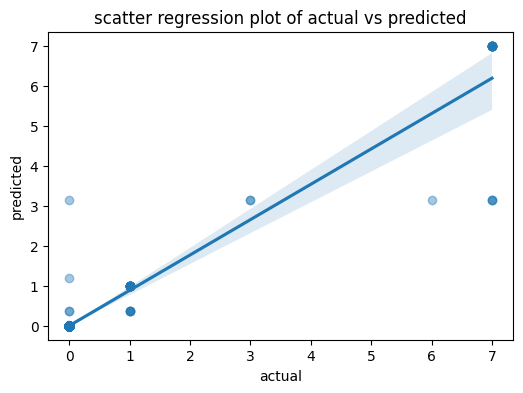

In [1907]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model Testing

In [1908]:
df[(df['Board'] == 1) & (df['Hour'] == 4) & (df['direction'] == 1) & (df['Min'] == 15)]['stop_cluster'].value_counts()

,count
stop_cluster,


In [1909]:
X = df[['Hour', 'Min', 'direction', 'Day_of_week', 'stop_cluster']]

In [1910]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model.predict([[i, j, 1, 1, 0]]))

4 0 1 [0.]
4 1 1 [0.]
4 2 1 [0.]
4 3 1 [0.]
4 4 1 [0.]
4 5 1 [0.]
4 6 1 [0.]
4 7 1 [0.]
4 8 1 [0.]
4 9 1 [0.]
4 10 1 [0.]
4 11 1 [0.]
4 12 1 [0.]
4 13 1 [0.]
4 14 1 [0.]
4 15 1 [0.]
4 16 1 [0.]
4 17 1 [0.]
4 18 1 [0.]
4 19 1 [0.]
4 20 1 [0.]
4 21 1 [0.]
4 22 1 [0.]
4 23 1 [0.]
4 24 1 [0.]
4 25 1 [0.]
4 26 1 [0.]
4 27 1 [0.]
4 28 1 [0.]
4 29 1 [0.]
4 30 1 [0.]
4 31 1 [0.]
4 32 1 [0.]
4 33 1 [0.]
4 34 1 [0.]
4 35 1 [0.]
4 36 1 [0.]
4 37 1 [0.]
4 38 1 [0.]
4 39 1 [0.]
4 40 1 [0.]
4 41 1 [0.]
4 42 1 [0.]
4 43 1 [0.]
4 44 1 [0.]
4 45 1 [0.]
4 46 1 [0.]
4 47 1 [0.]
4 48 1 [0.]
4 49 1 [0.]
4 50 1 [0.]
4 51 1 [0.]
4 52 1 [0.]
4 53 1 [0.]
4 54 1 [0.]
4 55 1 [0.]
4 56 1 [0.]
4 57 1 [0.]
4 58 1 [0.]
4 59 1 [0.]
5 0 1 [0.]
5 1 1 [0.]
5 2 1 [0.]
5 3 1 [0.]
5 4 1 [0.]
5 5 1 [0.]
5 6 1 [0.]
5 7 1 [0.]
5 8 1 [0.]
5 9 1 [0.]
5 10 1 [0.]
5 11 1 [0.]
5 12 1 [0.]
5 13 1 [0.]
5 14 1 [0.]
5 15 1 [0.]
5 16 1 [0.]
5 17 1 [0.]
5 18 1 [0.]
5 19 1 [0.]
5 20 1 [0.]
5 21 1 [0.]
5 22 1 [0.]
5 23 1 [0.]
5 24 1 [0.]


In [1911]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, xg_model.predict([[i, j, 1, 1, 10]]))

4 0 1 [6.8739173e-06]
4 1 1 [6.8739173e-06]
4 2 1 [6.8739173e-06]
4 3 1 [6.8739173e-06]
4 4 1 [6.8739173e-06]
4 5 1 [6.8739173e-06]
4 6 1 [6.8739173e-06]
4 7 1 [6.8739173e-06]
4 8 1 [6.8739173e-06]
4 9 1 [6.8739173e-06]
4 10 1 [6.8739173e-06]
4 11 1 [6.8739173e-06]
4 12 1 [6.8739173e-06]
4 13 1 [6.8739173e-06]
4 14 1 [6.8739173e-06]
4 15 1 [6.8739173e-06]
4 16 1 [6.8739173e-06]
4 17 1 [6.8739173e-06]
4 18 1 [6.8739173e-06]
4 19 1 [6.8739173e-06]
4 20 1 [6.8739173e-06]
4 21 1 [6.8739173e-06]
4 22 1 [6.8739173e-06]
4 23 1 [6.8739173e-06]
4 24 1 [6.8739173e-06]
4 25 1 [6.8739173e-06]
4 26 1 [8.660499e-06]
4 27 1 [6.7128817e-06]
4 28 1 [6.7128817e-06]
4 29 1 [6.7128817e-06]
4 30 1 [6.7128817e-06]
4 31 1 [6.7128817e-06]
4 32 1 [6.7128817e-06]
4 33 1 [6.7128817e-06]
4 34 1 [6.7128817e-06]
4 35 1 [6.7128817e-06]
4 36 1 [6.7128817e-06]
4 37 1 [6.7128817e-06]
4 38 1 [6.7128817e-06]
4 39 1 [6.7128817e-06]
4 40 1 [6.7128817e-06]
4 41 1 [6.7128817e-06]
4 42 1 [6.7128817e-06]
4 43 1 [6.7128817e-06]